In [242]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
def create_connection(db_file):
    """ 
    Create a database connection to the SQLite database specified by the db_file
    
    :param db_file: database file
    :return: the Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

In [81]:
# SUBSTITUTE THIS PATH BY THE CORRECT PATH ON YOUR LOCAL FILE SYSTEM
database = "C:/Users/user/Desktop/BTS/Master/1st_Semester/Data Science Foundations/DataScienceFoundations/Session_3_graded_assignment/imdb.db"

# Create a database connection
conn = create_connection(database)

#N = 10
query = "SELECT * FROM movie_metadata"#.format(N)
imdb = pd.read_sql_query(query, conn)

conn.close()

imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5043 non-null object
director_name                5043 non-null object
num_critic_for_reviews       5043 non-null int64
duration                     5043 non-null float64
director_facebook_likes      5043 non-null float64
actor_3_facebook_likes       5043 non-null float64
actor_2_name                 5043 non-null object
actor_1_facebook_likes       5043 non-null float64
gross                        5043 non-null float64
genres                       5043 non-null object
actor_1_name                 5043 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null float64
cast_total_facebook_likes    5043 non-null float64
actor_3_name                 5043 non-null object
facenumber_in_poster         5043 non-null object
plot_keywords                5043 non-null object
movie_imdb_link              5043 non

### Cleaning the data: removing columns that won't be used, movies that has number of votes less that 8000 and movies with no gross values

In [189]:
df = imdb[['movie_title', 'title_year', 'imdb_score', 'duration', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'gross', 'budget', 'genres', 'num_voted_users', 'num_user_for_reviews']]

In [293]:
df = df[(df['num_voted_users'] > 8000) & (df['gross'] > 0)]
df = df[df['director_name'].map(len) > 1]
df['profit'] = df['gross'] - df['budget']
df.head()

,movie_title,title_year,imdb_score,duration,director_name,actor_1_name,actor_2_name,actor_3_name,gross,budget,genres,num_voted_users,num_user_for_reviews,profit
0,Avatar,2009,7.9,178.0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,760505847.0,237000000.0,Action|Adventure|Fantasy|Sci-Fi,886204.0,3054,523505847.0
1,Pirates of the Caribbean: At World's End,2007,7.1,169.0,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,309404152.0,300000000.0,Action|Adventure|Fantasy,471220.0,1238,9404152.0
2,Spectre,2015,6.8,148.0,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,200074175.0,245000000.0,Action|Adventure|Thriller,275868.0,994,-44925825.0
3,The Dark Knight Rises,2012,8.5,164.0,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,448130642.0,250000000.0,Action|Thriller,1144337.0,2701,198130642.0
5,John Carter,2012,6.6,132.0,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,73058679.0,263700000.0,Action|Adventure|Sci-Fi,212204.0,738,-190641321.0


### check correlation matrix of data frame

In [294]:
df.corr()

,title_year,imdb_score,duration,gross,budget,num_voted_users,num_user_for_reviews,profit
title_year,1.000000,-0.162945,-0.144377,0.023604,0.043264,-0.006890,-0.011091,-0.035273
imdb_score,-0.162945,1.000000,0.365534,0.181171,0.018436,0.473016,0.301941,0.037486
duration,-0.144377,0.365534,1.000000,0.232503,0.057979,0.332449,0.343301,0.014379
gross,0.023604,0.181171,0.232503,1.000000,0.099437,0.609194,0.523775,0.209191
budget,0.043264,0.018436,0.057979,0.099437,1.000000,0.063867,0.068043,-0.952227
num_voted_users,-0.006890,0.473016,0.332449,0.609194,0.063867,1.000000,0.768250,0.124204
num_user_for_reviews,-0.011091,0.301941,0.343301,0.523775,0.068043,0.768250,1.000000,0.093884
profit,-0.035273,0.037486,0.014379,0.209191,-0.952227,0.124204,0.093884,1.000000


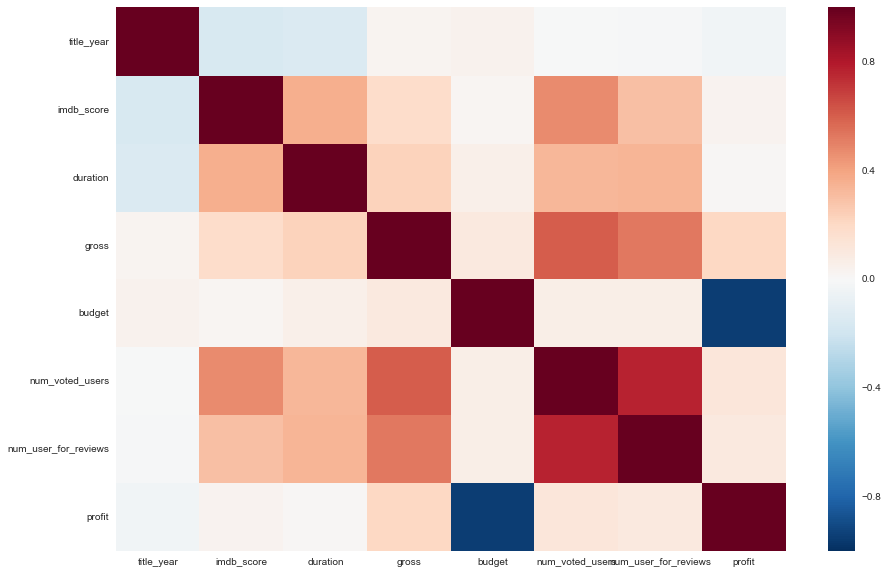

In [301]:
# plot heatmap to ilustrate results
plt.figure(figsize=[15,10])
sns.heatmap(df.corr())

### Calculate profit probability for movies with rating higher  than 6.0

In [459]:
print('with imdb rating more than 6, probability of profit is:', round(len(df[(df["imdb_score"] > 6.0) & (df['profit'] > 0)]) / len(df[df['imdb_score'] > 6]), 4))
# as we can see form result, probability of movie to be profitable with imdb rating more than 6.0 is 0.62

with imdb rating more than 6, probability of profit is: 0.6196


### relationship between duration and imdb rating of the movie

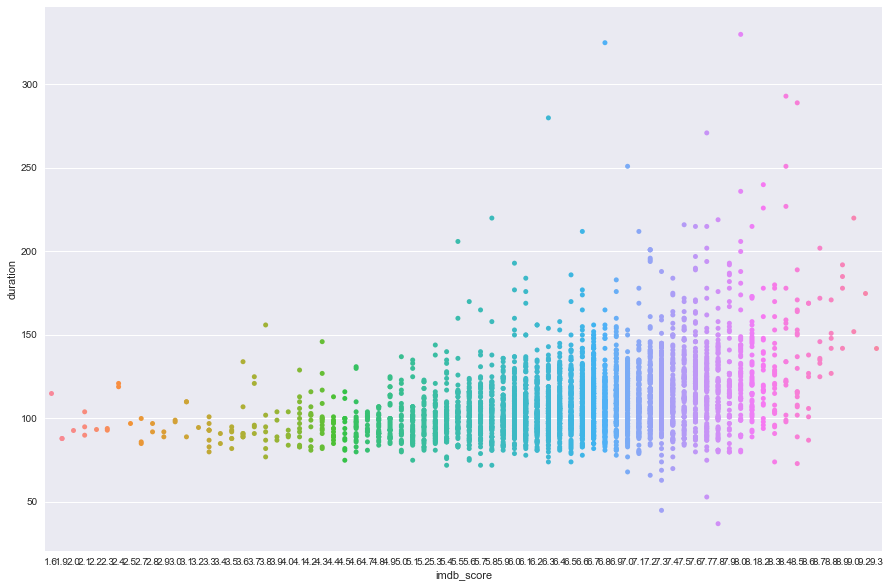

In [315]:
plt.figure(figsize=[15,10])
sns.stripplot(y='duration', x='imdb_score', data=df)

### movie distribution by imdb rating

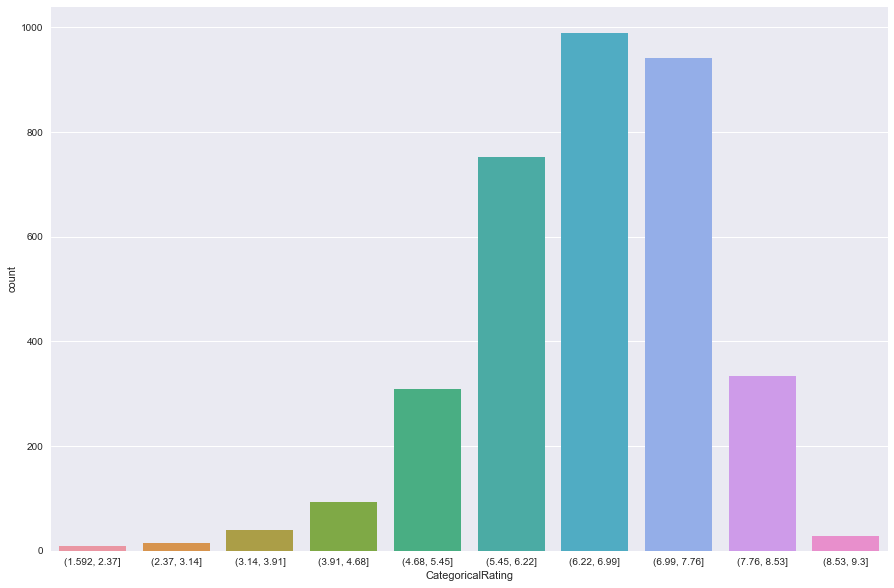

In [327]:
df['CategoricalRating'] = pd.cut(df['imdb_score'], 10) # divide rating of the movie in 10 equal scores too see distribution.
plt.figure(figsize=[15,10])
sns.countplot(df["CategoricalRating"])

### movie distribution by duration

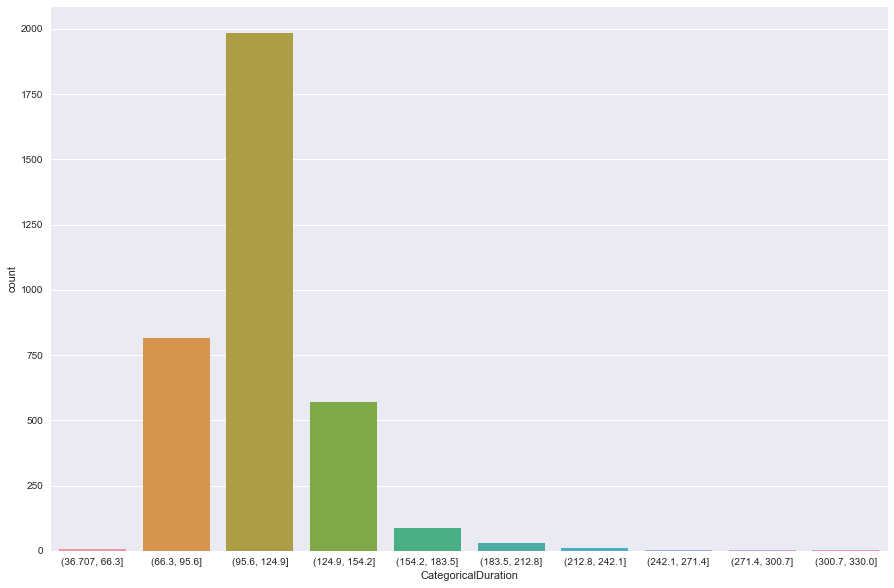

In [328]:
df['CategoricalDuration'] = pd.cut(df['duration'], 10) # divide duration of the movie in 10 equal periods too see distribution.
plt.figure(figsize=[15,10])
sns.countplot(df["CategoricalDuration"])

### imdb rating gross dependency by years 

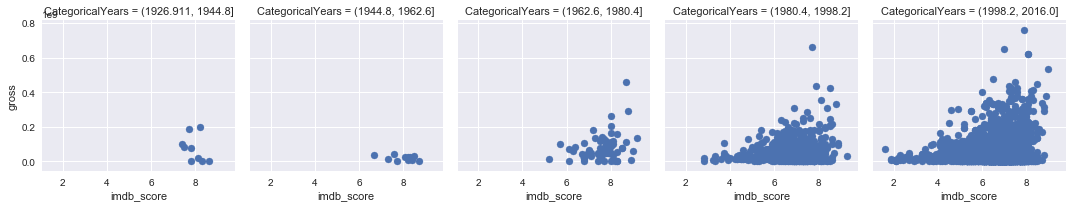

In [329]:
df['CategoricalYears'] = pd.cut(df['title_year'], 5) # divide year of the movie in 5 equal periods.
g = sns.FacetGrid(df, col="CategoricalYears", margin_titles=True)
g.map(plt.scatter, "imdb_score", "gross")

### imdb rating number of votes dependency by years
###### to see how the dependency stays more or less the same as number of votes by modern movies increases

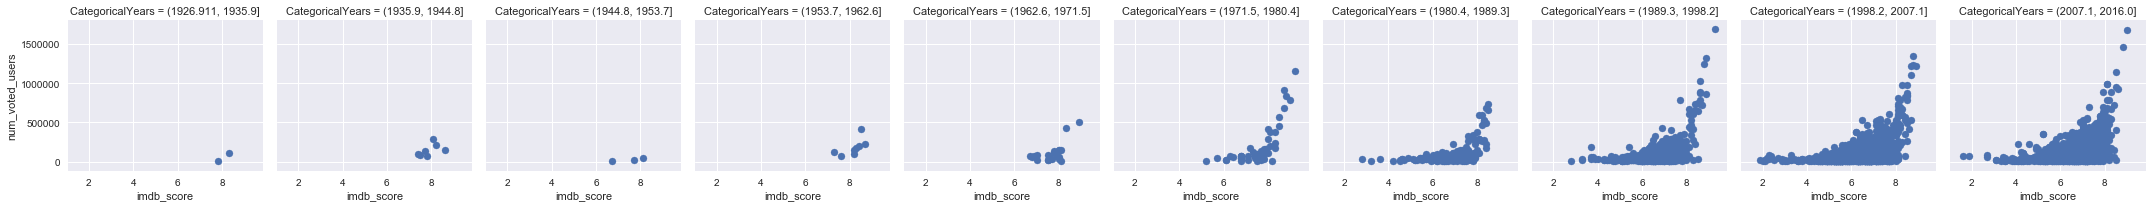

In [332]:
df['CategoricalYears'] = pd.cut(df['title_year'], 10) # divide year of the movie in 10 equal periods.
g = sns.FacetGrid(df, col="CategoricalYears", margin_titles=True)
g.map(plt.scatter, "imdb_score", "num_voted_users")

### ten most successfull directors by rating, gross and profit

In [336]:
top_10_direct_rating = df.sort_values('imdb_score', ascending=False).head(10)[['director_name', 'imdb_score', 'movie_title']]
top_10_direct_rating

,director_name,imdb_score,movie_title
1937,Frank Darabont,9.3,The Shawshank Redemption
3466,Francis Ford Coppola,9.2,The Godfather
66,Christopher Nolan,9.0,The Dark Knight
2837,Francis Ford Coppola,9.0,The Godfather: Part II
4498,Sergio Leone,8.9,"The Good, the Bad and the Ugly"
1874,Steven Spielberg,8.9,Schindler's List
339,Peter Jackson,8.9,The Lord of the Rings: The Return of the King
3355,Quentin Tarantino,8.9,Pulp Fiction
270,Peter Jackson,8.8,The Lord of the Rings: The Fellowship of the Ring
683,David Fincher,8.8,Fight Club


In [337]:
top_10_direct_gross = df.sort_values('gross', ascending=False).head(10)[['director_name', 'gross', 'movie_title']]
top_10_direct_gross

,director_name,gross,movie_title
0,James Cameron,760505847.0,Avatar
26,James Cameron,658672302.0,Titanic
29,Colin Trevorrow,652177271.0,Jurassic World
794,Joss Whedon,623279547.0,The Avengers
17,Joss Whedon,623279547.0,The Avengers
66,Christopher Nolan,533316061.0,The Dark Knight
240,George Lucas,474544677.0,Star Wars: Episode I - The Phantom Menace
3024,George Lucas,460935665.0,Star Wars: Episode IV - A New Hope
8,Joss Whedon,458991599.0,Avengers: Age of Ultron
3,Christopher Nolan,448130642.0,The Dark Knight Rises


In [338]:
top_10_direct_profit = df.sort_values('profit', ascending=False).head(10)[['director_name', 'profit', 'movie_title']]
top_10_direct_profit

,director_name,profit,movie_title
0,James Cameron,523505847.0,Avatar
29,Colin Trevorrow,502177271.0,Jurassic World
26,James Cameron,458672302.0,Titanic
3024,George Lucas,449935665.0,Star Wars: Episode IV - A New Hope
3080,Steven Spielberg,424449459.0,E.T. the Extra-Terrestrial
17,Joss Whedon,403279547.0,The Avengers
794,Joss Whedon,403279547.0,The Avengers
509,Roger Allers,377783777.0,The Lion King
240,George Lucas,359544677.0,Star Wars: Episode I - The Phantom Menace
66,Christopher Nolan,348316061.0,The Dark Knight


### ten most successfull actors by rating, gross, profit

In [343]:
top_10_actor_rating = df.sort_values('imdb_score', ascending=False).head(10)[['actor_1_name', 'imdb_score', 'movie_title']]
top_10_actor_rating

,actor_1_name,imdb_score,movie_title
1937,Morgan Freeman,9.3,The Shawshank Redemption
3466,Al Pacino,9.2,The Godfather
66,Christian Bale,9.0,The Dark Knight
2837,Robert De Niro,9.0,The Godfather: Part II
4498,Clint Eastwood,8.9,"The Good, the Bad and the Ugly"
1874,Liam Neeson,8.9,Schindler's List
339,Orlando Bloom,8.9,The Lord of the Rings: The Return of the King
3355,Bruce Willis,8.9,Pulp Fiction
270,Christopher Lee,8.8,The Lord of the Rings: The Fellowship of the Ring
683,Brad Pitt,8.8,Fight Club


In [344]:
top_10_actor_gross = df.sort_values('gross', ascending=False).head(10)[['actor_1_name', 'gross', 'movie_title']]
top_10_actor_gross

,actor_1_name,gross,movie_title
0,CCH Pounder,760505847.0,Avatar
26,Leonardo DiCaprio,658672302.0,Titanic
29,Bryce Dallas Howard,652177271.0,Jurassic World
794,Chris Hemsworth,623279547.0,The Avengers
17,Chris Hemsworth,623279547.0,The Avengers
66,Christian Bale,533316061.0,The Dark Knight
240,Natalie Portman,474544677.0,Star Wars: Episode I - The Phantom Menace
3024,Harrison Ford,460935665.0,Star Wars: Episode IV - A New Hope
8,Chris Hemsworth,458991599.0,Avengers: Age of Ultron
3,Tom Hardy,448130642.0,The Dark Knight Rises


In [345]:
top_10_actor_profit = df.sort_values('profit', ascending=False).head(10)[['actor_1_name', 'profit', 'movie_title']]
top_10_actor_profit

,actor_1_name,profit,movie_title
0,CCH Pounder,523505847.0,Avatar
29,Bryce Dallas Howard,502177271.0,Jurassic World
26,Leonardo DiCaprio,458672302.0,Titanic
3024,Harrison Ford,449935665.0,Star Wars: Episode IV - A New Hope
3080,Henry Thomas,424449459.0,E.T. the Extra-Terrestrial
17,Chris Hemsworth,403279547.0,The Avengers
794,Chris Hemsworth,403279547.0,The Avengers
509,Matthew Broderick,377783777.0,The Lion King
240,Natalie Portman,359544677.0,Star Wars: Episode I - The Phantom Menace
66,Christian Bale,348316061.0,The Dark Knight


In [378]:
df.groupby([df.CategoricalYears]).agg({'gross':'mean', 'imdb_score': 'mean'})[['gross', 'imdb_score']].reset_index()


,CategoricalYears,gross,imdb_score
0,"(1926.911, 1935.9]",1.513218e+06,8.050000
1,"(1935.9, 1944.8]",9.563482e+07,7.900000
2,"(1944.8, 1953.7]",1.988598e+07,7.500000
3,"(1953.7, 1962.6]",1.997326e+07,8.150000
4,"(1962.6, 1971.5]",5.077265e+07,7.671429
5,"(1971.5, 1980.4]",8.281679e+07,7.541176
6,"(1980.4, 1989.3]",5.759620e+07,6.850847
7,"(1989.3, 1998.2]",5.663432e+07,6.672505
8,"(1998.2, 2007.1]",4.990434e+07,6.437803
9,"(2007.1, 2016.0]",6.226332e+07,6.488658


### five most common co-works of director and actor

In [413]:
df.groupby(['director_name', 'actor_1_name']).size().nlargest(5)

director_name   actor_1_name  
Clint Eastwood  Clint Eastwood    9
Tim Burton      Johnny Depp       7
Woody Allen     Woody Allen       7
Gore Verbinski  Johnny Depp       5
Jason Reitman   J.K. Simmons      5
dtype: int64

### Average ratings for most frequent director/actor co-works

In [457]:
# average rating for director/actor co-work (Clint Eastwood, Clint Eastwood) is: 7.2
print('average rating for director/actor co-work (Clint Eastwood, Clint Eastwood) is:', np.round(df.loc[(df.director_name == 'Clint Eastwood') & (df.actor_1_name == 'Clint Eastwood')]['imdb_score'].mean(), 2))

# average rating for director/actor co-work (Tim Burton, Johnny Depp) is: 7.01
print('average rating for director/actor co-work (Tim Burton, Johnny Depp) is:', np.round(df.loc[(df.director_name == 'Tim Burton') & (df.actor_1_name == 'Johnny Depp')]['imdb_score'].mean(), 2))

# average rating for director/actor co-work (Woody Allen, Woody Allen) is: 6.91
print('average rating for director/actor co-work (Woody Allen, Woody Allen) is:', np.round(df.loc[(df.director_name == 'Woody Allen') & (df.actor_1_name == 'Woody Allen')]['imdb_score'].mean(), 2))

# average rating for director/actor co-work (Gore Verbinski  Johnny Depp) is: 7.24
print('average rating for director/actor co-work (Gore Verbinski  Johnny Depp) is:', np.round(df.loc[(df.director_name == 'Gore Verbinski') & (df.actor_1_name == 'Johnny Depp')]['imdb_score'].mean(), 2))

# average rating for director/actor co-work (Jason Reitman  J.K. Simmons) is: 7.38
print('average rating for director/actor co-work (Jason Reitman  J.K. Simmons) is:', np.round(df.loc[(df.director_name == 'Jason Reitman') & (df.actor_1_name == 'J.K. Simmons')]['imdb_score'].mean(), 2))

average rating for director/actor co-work (Clint Eastwood, Clint Eastwood) is: 7.2
average rating for director/actor co-work (Tim Burton, Johnny Depp) is: 7.01
average rating for director/actor co-work (Woody Allen, Woody Allen) is: 6.91
average rating for director/actor co-work (Gore Verbinski  Johnny Depp) is: 7.24
average rating for director/actor co-work (Jason Reitman  J.K. Simmons) is: 7.38


### five most common co-works of actor and actor

In [412]:
df.groupby(['actor_1_name', 'actor_2_name']).size().nlargest(5)

actor_1_name      actor_2_name    
Steve Buscemi     Adam Sandler        6
J.K. Simmons      James Franco        4
Leonard Nimoy     Nichelle Nichols    4
Paul Walker       Vin Diesel          4
Robert Pattinson  Kristen Stewart     4
dtype: int64

### Average ratings for most frequent actor1/actor2 co-works

In [456]:
# average rating for actor1/actor2 co-work (Steve Buscemi, Adam Sandler) is: 6.23
print('average rating for director/actor co-work (Steve Buscemi, Adam Sandler) is:', np.round(df.loc[(df.actor_1_name == 'Steve Buscemi') & (df.actor_2_name == 'Adam Sandler')]['imdb_score'].mean(), 2))

# average rating for actor1/actor2 co-work (J.K. Simmons, James Franco) is: 6.75
print('average rating for director/actor co-work (J.K. Simmons, James Franco) is:', np.round(df.loc[(df.actor_1_name == 'J.K. Simmons') & (df.actor_2_name == 'James Franco')]['imdb_score'].mean(), 2))

# average rating for actor1/actor2 co-work (Leonard Nimoy, Nichelle Nichols) is: 6.43
print('average rating for director/actor co-work (Leonard Nimoy, Nichelle Nichols) is:', np.round(df.loc[(df.actor_1_name == 'Leonard Nimoy') & (df.actor_2_name == 'Nichelle Nichols')]['imdb_score'].mean(), 2))

# average rating for actor1/actor2 co-work (Paul Walker, Vin Diesel) is: 6.85
print('average rating for director/actor co-work (Paul Walker, Vin Diesel) is:', np.round(df.loc[(df.actor_1_name == 'Paul Walker') & (df.actor_2_name == 'Vin Diesel')]['imdb_score'].mean(), 2))

# average rating for actor1/actor2 co-work (Robert Pattison, Kristen Stewart) is: 5.12
print('average rating for director/actor co-work (Robert Pattison, Kristen Stewart) is:', np.round(df.loc[(df.actor_1_name == 'Robert Pattinson') & (df.actor_2_name == 'Kristen Stewart')]['imdb_score'].mean(), 2))

average rating for director/actor co-work (Steve Buscemi, Adam Sandler) is: 6.23
average rating for director/actor co-work (J.K. Simmons, James Franco) is: 6.75
average rating for director/actor co-work (Leonard Nimoy, Nichelle Nichols) is: 6.43
average rating for director/actor co-work (Paul Walker, Vin Diesel) is: 6.85
average rating for director/actor co-work (Robert Pattison, Kristen Stewart) is: 5.12
